# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


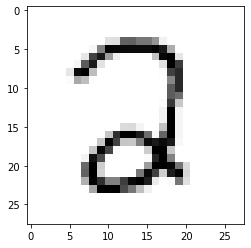

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.26457860916444426
train accuracy is: 0.5321315306292772, test accuracy is 0.5554435483870968


Epoch 10 Loss 0.08892429447122158
train accuracy is: 0.9260557502921049, test accuracy is 0.9274193548387096


Epoch 20 Loss 0.05367350859662661
train accuracy is: 0.9450842931063261, test accuracy is 0.9475806451612904


Epoch 30 Loss 0.04274103115051799
train accuracy is: 0.9530963111333667, test accuracy is 0.9576612903225806


Epoch 40 Loss 0.03714901522118387
train accuracy is: 0.9581872809213821, test accuracy is 0.9616935483870968


Epoch 50 Loss 0.03363921140102484
train accuracy is: 0.9609414121181773, test accuracy is 0.9621975806451613


Epoch 60 Loss 0.031196534949069668
train accuracy is: 0.9643632114838925, test accuracy is 0.9647177419354839


Epoch 70 Loss 0.02933934630252893
train accuracy is: 0.9661992989484226, test accuracy is 0.9662298387096774


Epoch 80 Loss 0.02785544425128614
train accuracy is: 0.9677015523284928, test accuracy is 0.9662298387096774


Epoch 90 Loss 0.026631123242311046
train accuracy is: 0.9689534301452178, test accuracy is 0.9672379032258065


Epoch 100 Loss 0.025599225268945088
train accuracy is: 0.970956434651978, test accuracy is 0.9672379032258065


Epoch 110 Loss 0.024709982238124716
train accuracy is: 0.971206810215323, test accuracy is 0.96875


Epoch 120 Loss 0.023920424770168452
train accuracy is: 0.971874478384243, test accuracy is 0.9692540322580645


Epoch 130 Loss 0.023221956079330378
train accuracy is: 0.9731263562009681, test accuracy is 0.96875


Epoch 140 Loss 0.022584171746278147
train accuracy is: 0.9735436488065431, test accuracy is 0.969758064516129


Epoch 150 Loss 0.022000465583949122
train accuracy is: 0.9742947754965782, test accuracy is 0.9707661290322581


Epoch 160 Loss 0.021465550569723112
train accuracy is: 0.9750459021866132, test accuracy is 0.9712701612903226


Epoch 170 Loss 0.020974757210549276
train accuracy is: 0.9756301118344183, test accuracy is 0.9717741935483871


Epoch 180 Loss 0.020515436707304605
train accuracy is: 0.9764646970455684, test accuracy is 0.9707661290322581


Epoch 190 Loss 0.02008599773345293
train accuracy is: 0.9770489066933734, test accuracy is 0.9712701612903226


Epoch 200 Loss 0.01967433083282287
train accuracy is: 0.9777165748622935, test accuracy is 0.9722782258064516


Epoch 210 Loss 0.01928455034053278
train accuracy is: 0.9784677015523285, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.018914613767602707
train accuracy is: 0.9786346185945585, test accuracy is 0.9727822580645161


Epoch 230 Loss 0.018551629412477545
train accuracy is: 0.9793022867634785, test accuracy is 0.9727822580645161


Epoch 240 Loss 0.01821292048312755
train accuracy is: 0.9794692038057086, test accuracy is 0.9737903225806451


0.02545658996306313

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24732173622763773
train accuracy is: 0.6659155399766317, test accuracy is 0.6738911290322581


Epoch 10 Loss 0.10274490219649342
train accuracy is: 0.9126189283925888, test accuracy is 0.9259072580645161


Epoch 20 Loss 0.0787500541846366
train accuracy is: 0.9291437155733601, test accuracy is 0.9450604838709677


Epoch 30 Loss 0.06786090577411366
train accuracy is: 0.9362376898681355, test accuracy is 0.9495967741935484


Epoch 40 Loss 0.06134579849254779
train accuracy is: 0.942580537472876, test accuracy is 0.9561491935483871


Epoch 50 Loss 0.05691255053268178
train accuracy is: 0.9460857953597063, test accuracy is 0.9586693548387096


Epoch 60 Loss 0.05365494446798414
train accuracy is: 0.9475880487397763, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.05113495143462345
train accuracy is: 0.9495910532465365, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.049113366362580825
train accuracy is: 0.9508429310632616, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.04744552352596477
train accuracy is: 0.9519278918377566, test accuracy is 0.9621975806451613


Epoch 100 Loss 0.04603920906426028
train accuracy is: 0.9527624770489067, test accuracy is 0.9632056451612904


Epoch 110 Loss 0.04483259356491837
train accuracy is: 0.9535970622600568, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.043782198117770406
train accuracy is: 0.9540978133867468, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.042856368970591044
train accuracy is: 0.9549323985978968, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.042032916345383815
train accuracy is: 0.9555166082457018, test accuracy is 0.9652217741935484


Epoch 150 Loss 0.041294194528895066
train accuracy is: 0.956100817893507, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.04062437789565765
train accuracy is: 0.9562677349357369, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.04001573483619698
train accuracy is: 0.956851944583542, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03945884446168293
train accuracy is: 0.957269237189117, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03894526832431543
train accuracy is: 0.9577699883158071, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038471577178931515
train accuracy is: 0.9583541979636121, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.03803109684685968
train accuracy is: 0.9586880320480721, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03762101716541262
train accuracy is: 0.9591053246536472, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03723697385376838
train accuracy is: 0.9594391587381071, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03687721002463769
train accuracy is: 0.9598564513436821, test accuracy is 0.9672379032258065


0.02491255606214056

### Comparing results of NN and LR

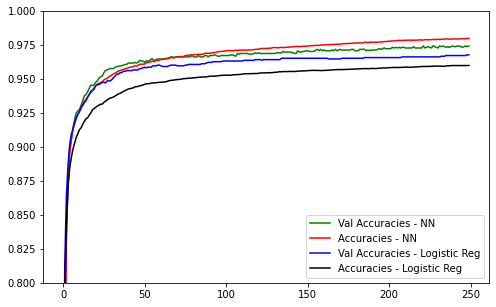

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

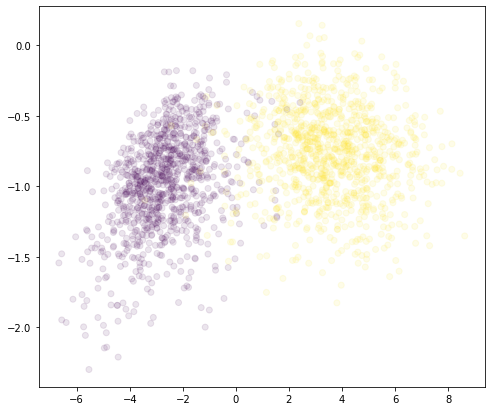

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

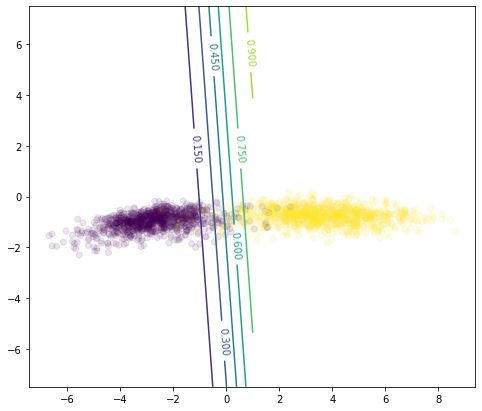

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );